In [12]:
from sqlalchemy import create_engine
from password import pw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
engine = create_engine('postgresql://postgres:' + pw + '@localhost:5432/employee_db')
connection = engine.connect()

In [2]:
data = pd.read_sql("SELECT salary FROM salaries", connection)
data.head(10)

,salary
0,60117
1,65828
2,40006
3,40054
4,78228
5,40000
6,56724
7,46671
8,60929
9,72488


Text(0, 0.5, 'Number of Employees')

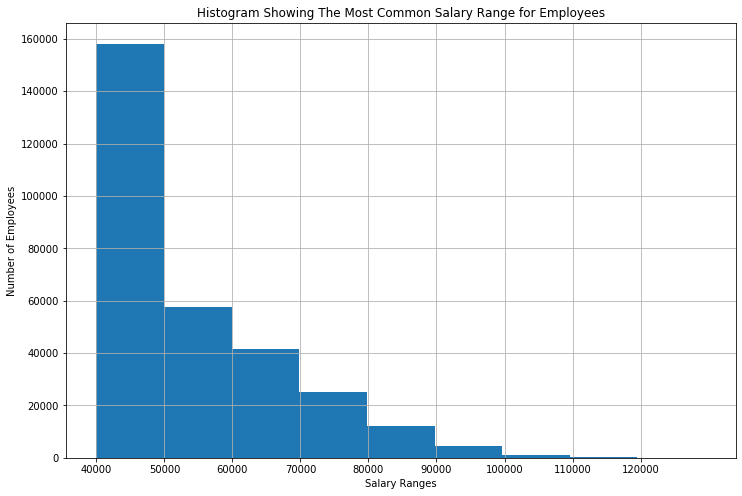

In [17]:
hist = data.hist(column='salary', bins=9, figsize=(12,8))
plt.xticks(np.arange(40000, 130000, 10000))
plt.title("Histogram Showing The Most Common Salary Range for Employees")
plt.xlabel("Salary Ranges")
plt.ylabel("Number of Employees")

In [19]:
bins = [39999, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999]

# Create labels for these bins
group_labels = ["40k to 49k", "50k to 59k", "60k to 69k", "70k to 79k", "80k to 89k", "90k to 99k",
                "100k to 109k", "110k to 119k", "120k to 129k"]
data["range"] = pd.cut(data["salary"], bins, labels=group_labels)

salaries_group = data.groupby('range')
count = salaries_group["range"].count()
print("Table showing number of employees in a salary range")
print(count)

Table showing number of employees in a salary range
range
40k to 49k      158465
50k to 59k       57915
60k to 69k       41413
70k to 79k       24814
80k to 89k       11845
90k to 99k        4284
100k to 109k      1069
110k to 119k       195
120k to 129k        24
Name: range, dtype: int64


In [33]:
avg_salary = pd.read_sql("SELECT t.title, AVG(s.salary) FROM employees AS e INNER JOIN titles AS t ON e.emp_title_id = t.title_id INNER JOIN salaries AS s ON e.emp_no = s.emp_no GROUP BY t.title ORDER BY avg", connection)
avg_salary

,title,avg
0,Senior Engineer,48506.799871
1,Engineer,48535.336511
2,Assistant Engineer,48564.434447
3,Technique Leader,48582.896092
4,Manager,51531.041667
5,Staff,58465.382850
6,Senior Staff,58550.172704


Text(0, 0.5, 'Average Salary')

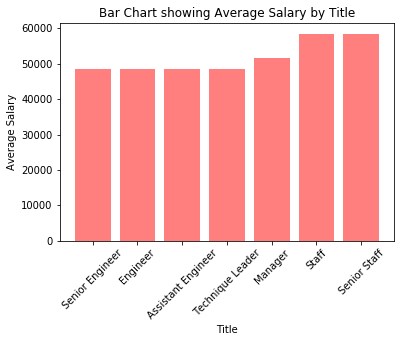

In [41]:
x_axis = np.arange(len(avg_salary))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, avg_salary["avg"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, ["Senior Engineer", "Engineer", "Assistant Engineer",
                            "Technique Leader", "Manager", "Staff", "Senior Staff"],
           rotation = 45)
plt.title("Bar Chart showing Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")